In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Data/airline_passengers.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'
df.tail()

In [4]:
train = df.iloc[:109]
test = df.iloc[108:]

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [21]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'], trend='mul',seasonal ='mul',seasonal_periods=12).fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [22]:
test_predictions = fitted_model.forecast(36)

In [23]:
test_predictions

1958-02-01    339.142839
1958-03-01    399.281567
1958-04-01    394.233518
1958-05-01    402.545212
1958-06-01    473.128729
1958-07-01    521.795258
1958-08-01    514.513564
1958-09-01    446.216722
1958-10-01    385.430842
1958-11-01    339.645012
1958-12-01    381.455551
1959-01-01    401.210071
1959-02-01    387.159060
1959-03-01    455.812296
1959-04-01    450.049538
1959-05-01    459.538011
1959-06-01    540.114821
1959-07-01    595.671611
1959-08-01    587.358966
1959-09-01    509.392582
1959-10-01    440.000570
1959-11-01    387.732331
1959-12-01    435.462452
1960-01-01    458.013840
1960-02-01    441.973470
1960-03-01    520.346708
1960-04-01    513.768052
1960-05-01    524.599914
1960-06-01    616.584878
1960-07-01    680.007460
1960-08-01    670.517902
1960-09-01    581.512951
1960-10-01    502.296340
1960-11-01    442.627906
1960-12-01    497.115710
1961-01-01    522.859949
Freq: MS, dtype: float64

In [24]:
len(test)

36

In [25]:
len(test_predictions)

36

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

<AxesSubplot:xlabel='Month'>

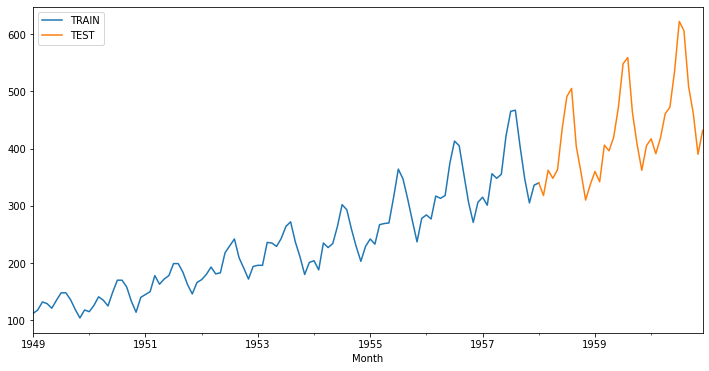

In [27]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test['Thousands of Passengers'].plot(legend=True, label="TEST")

<AxesSubplot:xlabel='Month'>

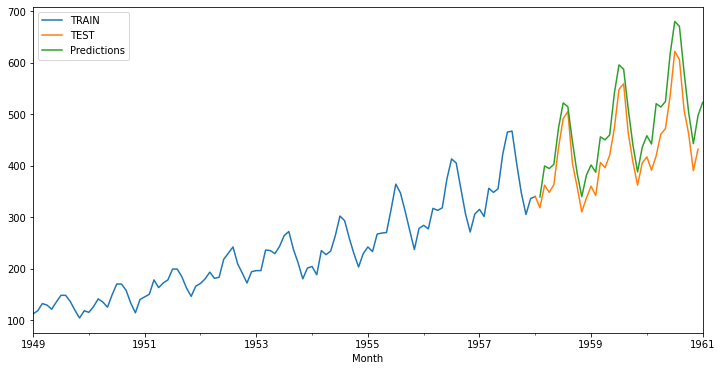

In [28]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test['Thousands of Passengers'].plot(legend=True, label="TEST")
test_predictions.plot(legend=True,label='Predictions')

### Evaluating forecasting the predictions

In [29]:
### Some evealuating metrices are
# 1. Mean Absolute /error
# 2. Mean squared error
# 3. Root mean squared error

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mean_absolute_error(test,test_predictions)

63.031111382769595

In [33]:

test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [37]:
np.sqrt(mean_squared_error(test,test_predictions))

74.92830909899264

In [39]:
# Retraining the data on the entire model of the dataset
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul',seasonal_periods=12).fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [41]:
future_forecast = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

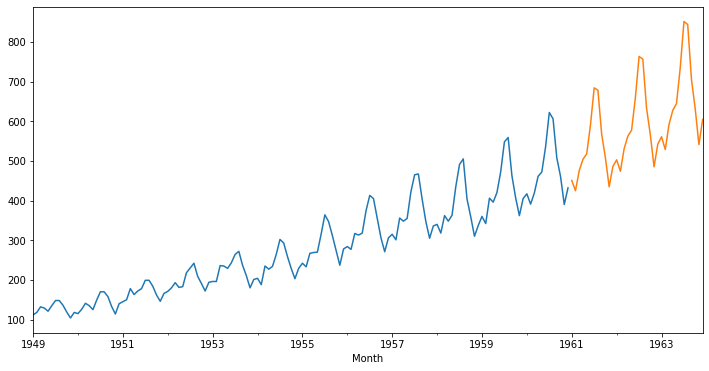

In [43]:
df['Thousands of Passengers'].plot()
future_forecast.plot()

### Forecasting models

#### Lets analyse a stock behavior based on whatever we learnt till date in forecasting

In [46]:
import pandas_datareader.data as web
from datetime import datetime

In [47]:
nifty = web.DataReader('^NSEI','yahoo',start=datetime(2018,1,1),end=datetime(2020,12,31))

In [75]:
nifty_df = nifty['Adj Close']

<AxesSubplot:xlabel='Date'>

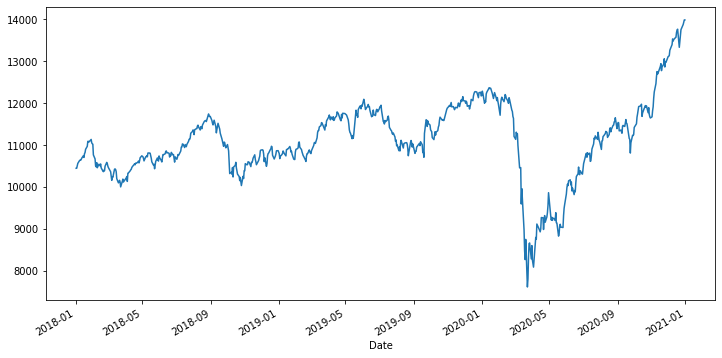

In [76]:
nifty_df.plot()

In [77]:
nifty_train = nifty.iloc[:int(len(nifty_df)*0.8)]
nifty_test = nifty.iloc[int(len(nifty_df)*0.8):]

<AxesSubplot:xlabel='Date'>

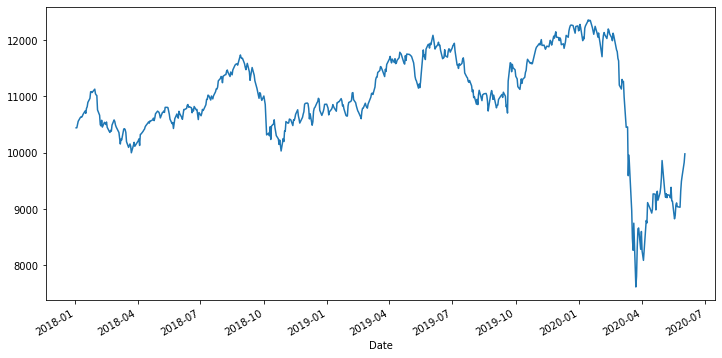

In [78]:
nifty_train['Adj Close'].plot()

In [79]:
nifty_train

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,10495.200195,10404.650391,10477.549805,10442.200195,153400.0,10442.200195
2018-01-03,10503.599609,10429.549805,10482.650391,10443.200195,167300.0,10443.200195
2018-01-04,10513.000000,10441.450195,10469.400391,10504.799805,174900.0,10504.799805
2018-01-05,10566.099609,10520.099609,10534.250000,10558.849609,180900.0,10558.849609
2018-01-08,10631.200195,10588.549805,10591.700195,10623.599609,169000.0,10623.599609
...,...,...,...,...,...,...
2020-05-27,9334.000000,9004.250000,9082.200195,9314.950195,763500.0,9314.950195
2020-05-28,9511.250000,9336.500000,9364.950195,9490.099609,837900.0,9490.099609
2020-05-29,9598.849609,9376.900391,9422.200195,9580.299805,967000.0,9580.299805


In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
nifty_model = ExponentialSmoothing(nifty_train['Adj Close'],trend='mul',seasonal='mul', seasonal_periods=21).fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [81]:
nifty_forecasted = nifty_model.forecast(10)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [82]:
nifty_forecasted

588     9943.454050
589    10008.170318
590    10122.468472
591    10091.973843
592    10196.474388
593    10358.218075
594    10352.051135
595    10506.631664
596    10447.642271
597    10618.308976
dtype: float64

In [86]:
nifty.reset_index(inplace=True)

In [88]:
nifty['Adj Close']

0      10442.200195
1      10443.200195
2      10504.799805
3      10558.849609
4      10623.599609
           ...     
731    13749.250000
732    13873.200195
733    13932.599609
734    13981.950195
735    13981.750000
Name: Adj Close, Length: 736, dtype: float64

In [89]:
nifty_train = nifty.iloc[:int(len(nifty_df)*0.8)]
nifty_test = nifty.iloc[int(len(nifty_df)*0.8):]

<AxesSubplot:>

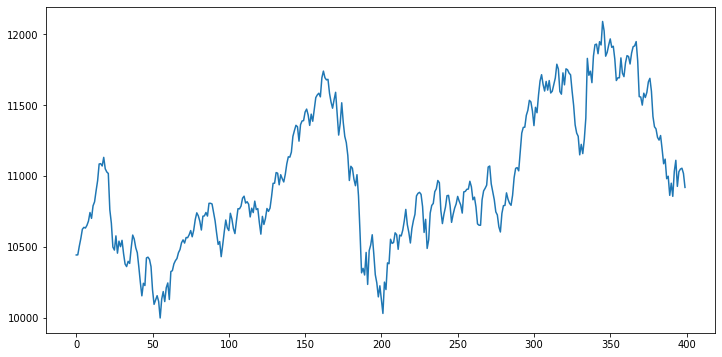

In [96]:
nifty_train['Adj Close'].iloc[:400].plot()
#nifty_forecasted.plot()

<AxesSubplot:>

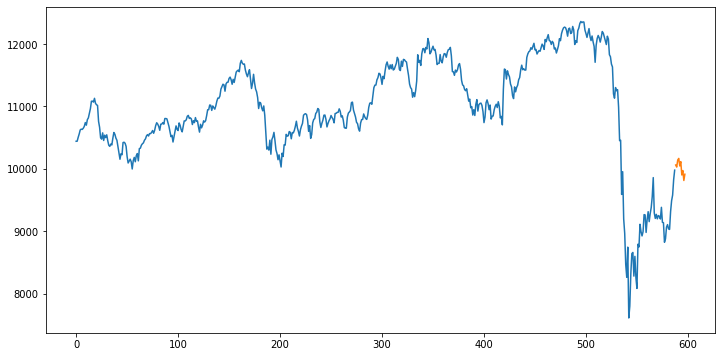

In [95]:
nifty_train['Adj Close'].plot()
nifty_test['Adj Close'].iloc[:10].plot()

In [97]:
new_nifty = nifty_train['Adj Close'].iloc[:400]

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
new_model = ExponentialSmoothing(new_nifty, trend='mul',seasonal='mul',seasonal_periods=21).fit()
ffdf = new_model.forecast(20)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

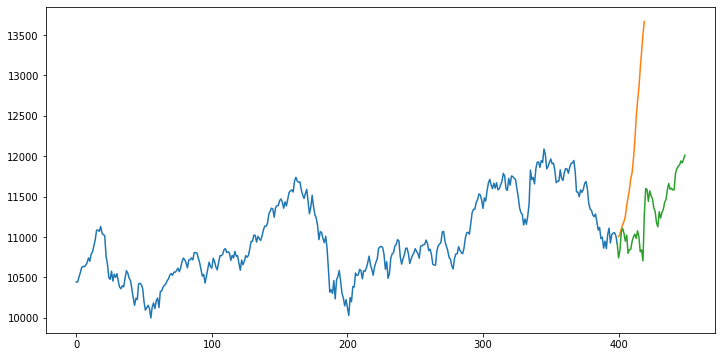

In [102]:
new_nifty.plot()
ffdf.plot()
nifty['Adj Close'].iloc[399:450].plot()

### This model has proven Useless in forecasting the future of Nifty 